In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_tweets(path):
    with open(path, "rb") as f:
        import pickle
        e_tweets = pickle.load(f)
    return e_tweets

In [3]:
tweets = load_tweets(path = "data/Trump_Tweets_Data-43442.pkl")
sentiment_labels = load_tweets(path = "data/Sentiment_Labels.pkl")

In [4]:
tweets.shape, sentiment_labels.shape

((43442, 7), (43442,))

In [5]:
tweets.head()

,id,created_at,source,retweet_count,text,clean,sentiment
0,1238046001744826369,2020-03-12 10:15:43,Twitter for iPhone,1241,“Nancy Pelosi all of a sudden doesn’t like the...,nancy pelosi all of a sudden does not like th...,0.0516
1,1238042153483411456,2020-03-12 10:00:25,Twitter for iPhone,3987,RT @charliekirk11: Facts:\n\nFederal tax dolla...,facts federal tax dollars will no longer g...,-0.8481
2,1238041635256238080,2020-03-12 09:58:22,Twitter for iPhone,6525,RT @JonathanTurley: Schumer's threat to the Co...,schumer s threat to the court that you will...,-0.6486
3,1238041481396588544,2020-03-12 09:57:45,Twitter for iPhone,2306,RT @flightcrew: MUST WATCH!! Best Trump Ad Eve...,must watch best trump ad ever fighte...,0.7482
4,1238040722391150592,2020-03-12 09:54:44,Twitter for iPhone,7136,RT @RyanAFournier: 77% of Americans are confid...,of americans are confident in the trump ...,0.6705


 1    24445
-1    10547
 0     8450
Name: sentiment, dtype: int64


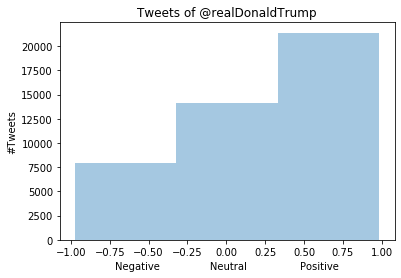

In [14]:
print(sentiment_labels.value_counts())
ax = sns.distplot(tweets.sentiment, kde=False, bins=3)
ax.set(xlabel='Negative                Neutral                 Positive', ylabel='#Tweets') 
ax.set(title="Tweets of @realDonaldTrump");

In [12]:
tweets['source'].value_counts()

Twitter for Android         14918
Twitter for iPhone          13640
Twitter Web Client          13013
TweetDeck                     527
TwitLonger Beta               502
Twitter Media Studio          226
Instagram                     135
Facebook                      107
Twitter for BlackBerry         99
Twitter Ads                    96
Twitter for iPad               60
Twitter Web App                60
Twitlonger                     23
Twitter QandA                  12
Vine - Make a Scene            10
Periscope                       7
Neatly For BlackBerry 10        5
Twitter for Websites            1
Twitter Mirror for iPad         1
Name: source, dtype: int64

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
eng_stopwords = stopwords.words('english')

In [35]:
tokens = tweets.clean.apply(word_tokenize)
all_words = tokens.explode().values
sentence_lengths = [len(token) for token in tokens]
vocab = set(all_words)
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(vocab)))
print("Max sentence length is %s" % max(sentence_lengths))

673727 words total, with a vocabulary size of 21491
Max sentence length is 33


In [8]:
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(20)

[('the', 28399),
 ('to', 16778),
 ('is', 13257),
 ('a', 13199),
 ('and', 11816),
 ('you', 11272),
 ('of', 10986),
 ('in', 10290),
 ('i', 9716),
 ('for', 8543),
 ('on', 7060),
 ('trump', 6722),
 ('not', 6683),
 ('will', 6006),
 ('it', 5659),
 ('be', 5637),
 ('great', 5590),
 ('are', 5274),
 ('that', 4887),
 ('s', 4744)]

In [64]:
non_stop_word_tokens = tokens.apply(lambda tweet: [word for word in tweet if not word in eng_stopwords])
non_stop_words = non_stop_word_tokens.explode().values
sentence_length = [len(token) for token in non_stop_word_tokens]
non_stop_word_vocab = set(non_stop_words)
print("%s words total, with a vocabulary size of %s" % (len(non_stop_words), len(non_stop_word_vocab)))
print("Max sentence length is %s" % max(sentence_length))

373156 words total, with a vocabulary size of 21347
Max sentence length is 21


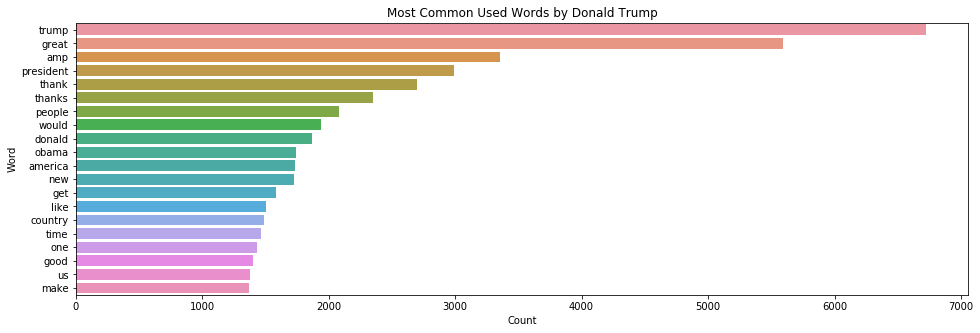

In [65]:
non_stopword_freq_dist = nltk.FreqDist(non_stop_words)
word_df = pd.DataFrame({'Word': list(non_stopword_freq_dist.keys()),
                  'Count': list(non_stopword_freq_dist.values())})    
word_df = word_df.sort_values('Count', ascending = False).iloc[0:20, : ]

fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(x='Count', y="Word", data = word_df, ax = ax)
ax.set_title('Most Common Used Words by Donald Trump')
plt.show();

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def fd_and_df(data, num_words = 20, ngrams = (1, 1), data_type = 'word'):
    cv = CountVectorizer(ngram_range = ngrams, stop_words= eng_stopwords)
    bow = cv.fit_transform(data)
    fd = nltk.FreqDist(dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel())))
    df = pd.DataFrame(list(fd.items()), columns = [data_type, 'freq']).sort_values(by=['freq'], ascending = False)
    return fd, df.iloc[0:num_words, :]

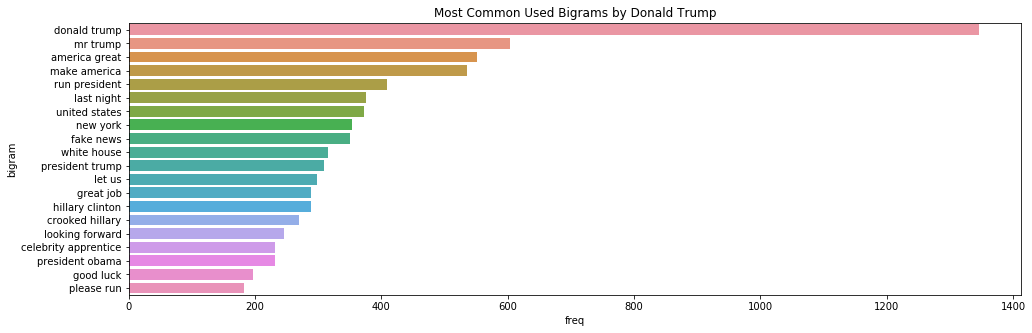

In [24]:
top_bigrams = fd_and_df(tweets.clean.values, ngrams = (2, 2), data_type = 'bigram')

fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(x='freq', y="bigram", data = top_bigrams[1], ax = ax)
ax.set_title('Most Common Used Bigrams by Donald Trump')
plt.show();

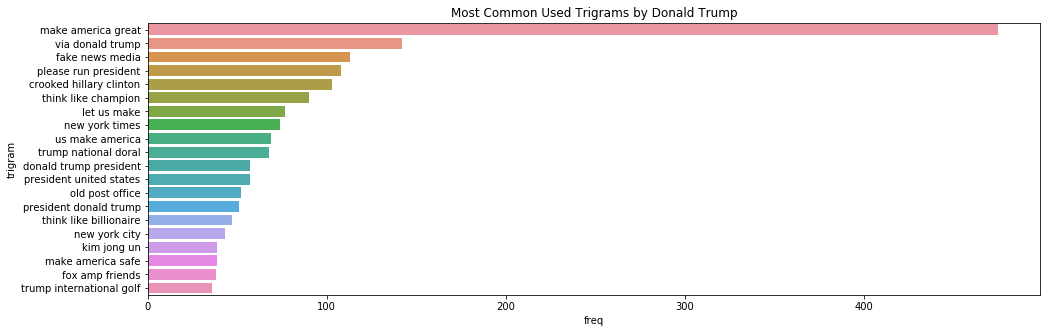

In [25]:
top_trigrams = fd_and_df(tweets.clean.values, ngrams = (3, 3), data_type = 'trigram')

fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(x='freq', y="trigram", data = top_trigrams[1], ax = ax)
ax.set_title('Most Common Used Trigrams by Donald Trump')
plt.show();

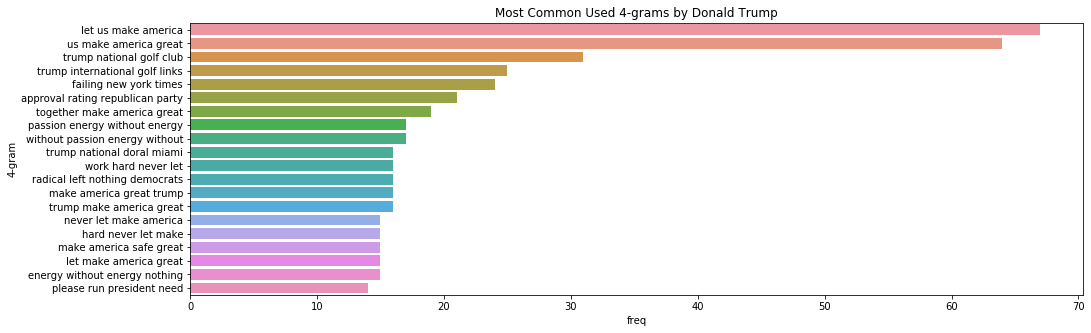

In [47]:
top_4grams = fd_and_df(tweets.clean.values, ngrams = (4, 4), data_type = '4-gram')

fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(x='freq', y="4-gram", data = top_4grams[1], ax = ax)
ax.set_title('Most Common Used 4-grams by Donald Trump')
plt.show();

In [28]:
from wordcloud import WordCloud
def word_clouder(fd, num_words = 50):    
    wordcloud = WordCloud(width=500, height=200, max_words = num_words, random_state=21, max_font_size=110).generate_from_frequencies(fd)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [8]:
import re
def users_fd(tw):
    users = [u for u in tw.apply(lambda x: re.findall("@[\w]*", x)).explode().values if type(u) is str]
    return nltk.FreqDist(users)
users_mentioned_fd = users_fd(tweets.text)

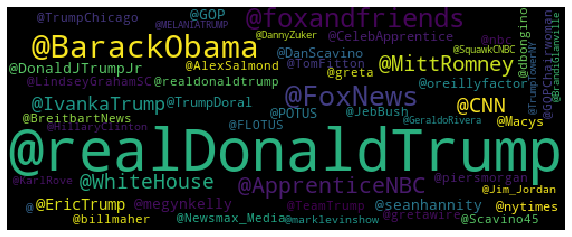

[('@realDonaldTrump', 9615),
 ('@BarackObama', 812),
 ('@FoxNews', 617),
 ('@foxandfriends', 564),
 ('@ApprenticeNBC', 413),
 ('@MittRomney', 358),
 ('@CNN', 316),
 ('@WhiteHouse', 306),
 ('@IvankaTrump', 282),
 ('@EricTrump', 177),
 ('@DonaldJTrumpJr', 159),
 ('@GOP', 158),
 ('@seanhannity', 156),
 ('@megynkelly', 154),
 ('@CelebApprentice', 141),
 ('@Macys', 136),
 ('@nytimes', 133),
 ('@oreillyfactor', 133),
 ('@DanScavino', 132),
 ('@POTUS', 129)]

In [30]:
word_clouder(users_mentioned_fd)
users_mentioned_fd.most_common(20)

In [31]:
def hashtag_fd(tw):
    ht = [ht for ht in tw.apply(lambda x: re.findall("#[\w]*", x)).explode().values if type(ht) is str]
    return nltk.FreqDist(ht)
ht_fd = hashtag_fd(tweets.text)

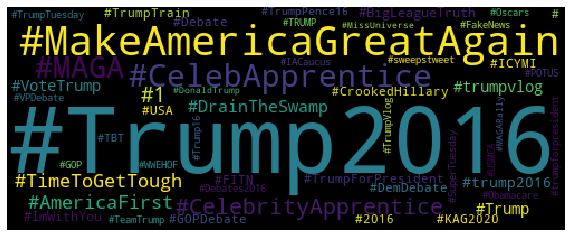

[('#Trump2016', 860),
 ('#MakeAmericaGreatAgain', 565),
 ('#CelebApprentice', 293),
 ('#MAGA', 268),
 ('#CelebrityApprentice', 150),
 ('#1', 133),
 ('#TimeToGetTough', 108),
 ('#AmericaFirst', 106),
 ('#DrainTheSwamp', 81),
 ('#Trump', 75),
 ('#trumpvlog', 74),
 ('#VoteTrump', 73),
 ('#trump2016', 66),
 ('#ImWithYou', 57),
 ('#BigLeagueTruth', 57),
 ('#2016', 48),
 ('#TrumpForPresident', 47),
 ('#DemDebate', 45),
 ('#TrumpTrain', 45),
 ('#CrookedHillary', 43)]

In [32]:
word_clouder(ht_fd)
ht_fd.most_common(20)

In [33]:
pos_tweets, neg_tweets = tweets.loc[tweets.sentiment>0,:], tweets.loc[tweets.sentiment<0,:]

In [50]:
def count_df(df):
    X = df.text
    
    def count_regex(pattern, tweet):
        return len(re.findall(pattern, tweet))

    tweet_length = X.apply(len)
    count_words =  X.apply(lambda x: count_regex(r'\w+', x))
    count_hashtags = X.apply(lambda x: count_regex(r'#\w+', x))
    count_capital_words = X.apply(lambda x: count_regex(r'\b[A-Z]{2,}\b', x))
    count_excl_quest_marks = X.apply(lambda x: count_regex(r'!|\?', x))
    df = pd.DataFrame({'tweet_length': tweet_length
                       ,'count_words': count_words
                       , 'count_hashtags': count_hashtags
                       , 'count_capital_words': count_capital_words
                       , 'count_excl_quest_marks': count_excl_quest_marks
                       ,'clean_text': df.clean
                       ,'sentiment': df.sentiment
                      })
    return df

In [51]:
tweet_cts = count_df(tweets)
tweet_cts.describe()

,tweet_length,count_words,count_hashtags,count_capital_words,count_excl_quest_marks,sentiment
count,43442.000000,43442.000000,43442.000000,43442.000000,43442.000000,43442.000000
mean,111.614382,18.252198,0.181944,0.591225,0.573915,0.212580
std,34.252463,6.565939,0.515185,1.419437,0.860431,0.505621
min,5.000000,1.000000,0.000000,0.000000,0.000000,-0.973500
25%,92.000000,14.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,20.000000,0.000000,0.000000,0.000000,0.318200
75%,139.000000,23.000000,0.000000,1.000000,1.000000,0.648600
max,155.000000,45.000000,10.000000,25.000000,17.000000,0.985700


Most negative tweets by Trump:

   Democrat Jon Ossoff would be a disaster in Congress. VERY weak on crime and illegal immigration, bad for jobs and wants higher taxes. Say NO

   .@NBCNews is bad but Saturday Night Live is the worst of NBC. Not funny, cast is terrible, always a complete hit job. Really bad television!

   NYC terrorist was happy as he asked to hang ISIS flag in his hospital room. He killed 8 people, badly injured 12. SHOULD GET DEATH PENALTY!

   I love the Mexican people, but Mexico is not our friend. They're killing us at the border and they're killing us on jobs and trade. FIGHT!

   If Graydon Carter's very dumb bosses would fire him for his terrible circulation numbers at failing Vanity Fair-his bad food restaurants die

   If Graydon Carter's very dumb bosses would fire him for his terrible circulation numbers at failing Vanity Fair-his bad food restaurants die

   At least 12 dead and 50 wounded in Colorado--bring back fast trials &amp; death penalty for mass m

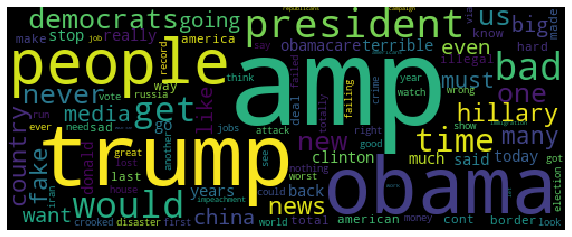

,word,freq
388,amp,1050
10736,trump,988
7103,obama,825
7540,people,632
7934,president,608
767,bad,530
11595,would,512
4338,get,459
10511,time,441
2713,democrats,430


In [52]:
neg_tweet_cts = tweet_cts.loc[tweet_cts.sentiment < 0, :]
neg_text = neg_tweets.sort_values(by = ['sentiment']).clean
print('Most negative tweets by Trump:')
for t in neg_tweets.sort_values(by = ['sentiment']).text.head(10):
    print('\n  ', t)
fd_df = fd_and_df(neg_text)
print('Most common words used in negative tweets:')
negative_word_cloud = word_clouder( fd_df[0], num_words = 100)
fd_df[1]

In [53]:
print(f'The average length of negative tweets is: {np.mean(neg_tweet_cts.tweet_length)} ')

The average length of negative tweets is: 123.54916089883379 


Most positive tweets by Trump:

   If their highly unethical behavior, including begging me for ads, isn’t questionable enough, they have endorsed a candidate who can’t win.

   Wow, ratings for “Morning Joe,” which were really bad in the first place, just “tanked” with the release of the Mue… https://t.co/A1bnTKS1eT

   It is really a shame that Barack Obama may stop $5M from being generously donated to charity all because he refuses to be transparent.

   ...I agree with their stance 100%, and the United States is likewise taking a very hard line on illegal immigration… https://t.co/mq76lhvl2C

   Wow, NFL first game ratings are way down over an already really bad last year comparison. Viewership declined 13%,… https://t.co/niWIFRXL8H

   .@Oprah was great-- amazing that she got Lance Armstrong to totally destroy his life. Why did he ever do that interview?

   Patrick Moore, co-founder of Greenpeace: “The whole climate crisis is not only Fake News, it’s Fake Science. There… https://

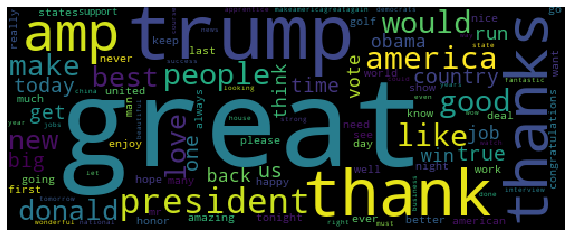

,word,freq
5934,great,5345
14128,trump,3903
13655,thank,2627
13661,thanks,2229
490,amp,1863
10521,president,1690
468,america,1328
10028,people,1208
5802,good,1205
7952,like,1175


In [54]:
pos_tweet_cts = tweet_cts.loc[tweet_cts.sentiment > 0, :]
pos_text = pos_tweets.sort_values(by = ['sentiment']).clean
print('Most positive tweets by Trump:')
for t in pos_tweets.sort_values(by = ['sentiment']).text.head(10):
    print('\n  ', t)
pos_fd_df = fd_and_df(pos_text)
print('Most common words used in positive tweets:')
pos_word_cloud = word_clouder( pos_fd_df[0], num_words = 100)
pos_fd_df[1]

In [55]:
print(f'The average length of positive tweets is: {np.mean(pos_tweet_cts.tweet_length)} ')

The average length of positive tweets is: 110.68091634281039 


In [56]:
pos_users_mentioned_fd = users_fd(pos_tweets.text)
neg_users_mentioned_fd = users_fd(neg_tweets.text)

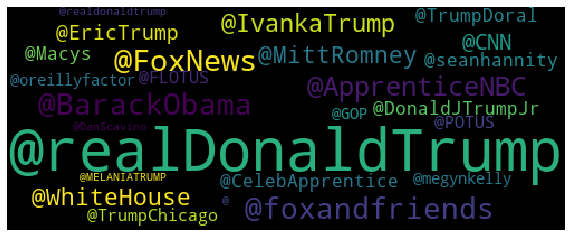

[('@realDonaldTrump', 6185),
 ('@FoxNews', 303),
 ('@foxandfriends', 289),
 ('@BarackObama', 280),
 ('@ApprenticeNBC', 244),
 ('@IvankaTrump', 206),
 ('@WhiteHouse', 191),
 ('@MittRomney', 183),
 ('@CNN', 142),
 ('@EricTrump', 124),
 ('@DonaldJTrumpJr', 97),
 ('@TrumpDoral', 94),
 ('@CelebApprentice', 92),
 ('@seanhannity', 89),
 ('@Macys', 88),
 ('@TrumpChicago', 81),
 ('@FLOTUS', 80),
 ('@POTUS', 78),
 ('@megynkelly', 76),
 ('@GOP', 72)]

In [57]:
pos_wc = word_clouder(pos_users_mentioned_fd, num_words = 25)
pos_users_mentioned_fd.most_common(20)

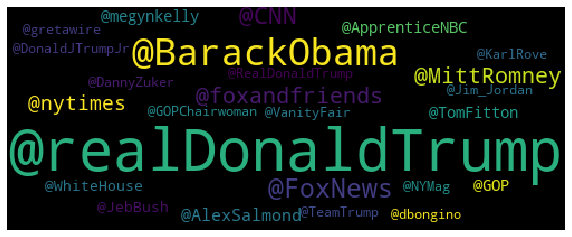

[('@realDonaldTrump', 1421),
 ('@BarackObama', 362),
 ('@FoxNews', 145),
 ('@CNN', 116),
 ('@foxandfriends', 111),
 ('@MittRomney', 109),
 ('@nytimes', 91),
 ('@AlexSalmond', 59),
 ('@TomFitton', 52),
 ('@GOP', 51),
 ('@ApprenticeNBC', 50),
 ('@megynkelly', 47),
 ('@WhiteHouse', 40),
 ('@JebBush', 39),
 ('@DannyZuker', 34),
 ('@dbongino', 33),
 ('@GOPChairwoman', 31),
 ('@KarlRove', 31),
 ('@VanityFair', 31),
 ('@NYMag', 29)]

In [58]:
neg_wc = word_clouder(neg_users_mentioned_fd, num_words = 25)
neg_users_mentioned_fd.most_common(20)

In [59]:
pos_ht_fd = hashtag_fd(pos_tweets.text)
neg_ht_fd = hashtag_fd(neg_tweets.text)

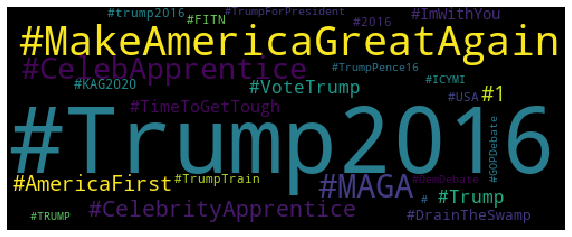

[('#Trump2016', 567),
 ('#MakeAmericaGreatAgain', 347),
 ('#MAGA', 202),
 ('#CelebApprentice', 170),
 ('#CelebrityApprentice', 94),
 ('#1', 82),
 ('#AmericaFirst', 79),
 ('#Trump', 51),
 ('#VoteTrump', 48),
 ('#TimeToGetTough', 42),
 ('#ImWithYou', 37),
 ('#DrainTheSwamp', 37),
 ('#KAG2020', 33),
 ('#trump2016', 30),
 ('#FITN', 30),
 ('#TrumpTrain', 30),
 ('#2016', 29),
 ('#USA', 28),
 ('#GOPDebate', 25),
 ('#ICYMI', 25)]

In [60]:
pos_ht = word_clouder(pos_ht_fd, num_words = 25)
pos_ht_fd.most_common(20)

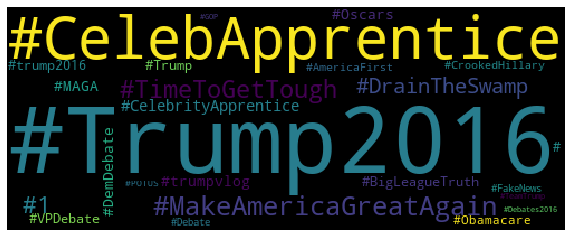

[('#Trump2016', 54),
 ('#CelebApprentice', 46),
 ('#MakeAmericaGreatAgain', 37),
 ('#TimeToGetTough', 32),
 ('#1', 28),
 ('#DrainTheSwamp', 22),
 ('#CelebrityApprentice', 19),
 ('#DemDebate', 17),
 ('#MAGA', 16),
 ('#trumpvlog', 16),
 ('#Oscars', 15),
 ('#BigLeagueTruth', 15),
 ('#', 14),
 ('#trump2016', 13),
 ('#Trump', 12),
 ('#VPDebate', 11),
 ('#Obamacare', 10),
 ('#CrookedHillary', 10),
 ('#AmericaFirst', 10),
 ('#Debate', 8)]

In [61]:
neg_ht = word_clouder(neg_ht_fd, num_words = 25)
neg_ht_fd.most_common(20)

In [62]:
print(f'The average count of capital words used in negative tweets is: {np.mean(neg_tweet_cts.count_capital_words)} ')
print(f'The average count of hashtags used in negative tweets is: {np.mean(neg_tweet_cts.count_hashtags)} ')
print(f'The average count of excl or quest marks used in negative tweets is: {np.mean(neg_tweet_cts.count_excl_quest_marks)} ')

The average count of capital words used in negative tweets is: 0.6220726272873803 
The average count of hashtags used in negative tweets is: 0.09339148573053949 
The average count of excl or quest marks used in negative tweets is: 0.5146487152744856 


In [63]:
print(f'The average count of capital words used in positive tweets is: {np.mean(pos_tweet_cts.count_capital_words)} ')
print(f'The average count of hashtags used in positive tweets is: {np.mean(pos_tweet_cts.count_hashtags)} ')
print(f'The average count of exclamation or question marks used in positive tweets is: {np.mean(pos_tweet_cts.count_excl_quest_marks)} ')

The average count of capital words used in positive tweets is: 0.5811004295356924 
The average count of hashtags used in positive tweets is: 0.18985477602781756 
The average count of exclamation or question marks used in positive tweets is: 0.6518715483739006 


In [9]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import PunktSentenceTokenizer
from nltk.tag import pos_tag
from nltk.corpus import wordnet

In [68]:
wnl = WordNetLemmatizer()
ps = PorterStemmer()

def lemmatizer(text):
    tokens = text.split()
    tagged_tokens = pos_tag(tokens)
    tag_map = {'j': wordnet.ADJ, 'v': wordnet.VERB, 'n': wordnet.NOUN, 'r': wordnet.ADV}
    wordnet_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN))
                            for word, tag in tagged_tokens]
    lemmatized_text = ' '.join(wnl.lemmatize(word, tag) for word, tag in wordnet_tokens)
    return lemmatized_text

In [84]:
clean_text = non_stop_word_tokens.apply(lambda word: ' '.join(x for x in word))

In [87]:
stemmed_text = clean_text.apply(lambda x: ps.stem(x))
lemmatized_text = clean_text.apply(lemmatizer)

In [105]:
import gensim
from gensim import corpora

lemm_tokens = lemmatized_text.apply(lambda x: x.split())
dictionary = corpora.Dictionary(lemm_tokens)
doc_term_matrix = [dictionary.doc2bow(tweet) for tweet in lemm_tokens]

In [109]:
LDA = gensim.models.ldamodel.LdaModel

lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=4, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [110]:
lda_model.print_topics()

[(0,
  '0.041*"great" + 0.037*"thank" + 0.031*"trump" + 0.013*"new" + 0.011*"love" + 0.010*"honor" + 0.009*"thanks" + 0.008*"amp" + 0.008*"th" + 0.008*"donald"'),
 (1,
  '0.034*"great" + 0.015*"make" + 0.015*"good" + 0.014*"state" + 0.014*"today" + 0.013*"america" + 0.012*"border" + 0.011*"amp" + 0.009*"house" + 0.009*"big"'),
 (2,
  '0.028*"president" + 0.025*"trump" + 0.012*"vote" + 0.012*"country" + 0.010*"would" + 0.009*"need" + 0.009*"get" + 0.009*"obama" + 0.009*"republican" + 0.009*"run"'),
 (3,
  '0.012*"work" + 0.012*"people" + 0.010*"fake" + 0.010*"amp" + 0.009*"news" + 0.009*"say" + 0.009*"democrat" + 0.008*"get" + 0.008*"clinton" + 0.008*"hillary"')]

In [111]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.172579 -0.064726       1        1  29.676556
3     -0.228201  0.091075       2        1  25.484545
0      0.168841 -0.249210       3        1  24.083439
1      0.231939  0.222860       4        1  20.755465, topic_info=          Term         Freq        Total Category  logprob  loglift
88       great  6255.000000  6255.000000  Default  30.0000  30.0000
99       thank  3362.000000  3362.000000  Default  29.0000  29.0000
126  president  3084.000000  3084.000000  Default  28.0000  28.0000
42       trump  5500.000000  5500.000000  Default  27.0000  27.0000
363       good  1139.000000  1139.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
147        job   532.260193  1658.363281   Topic4  -4.9791   0.4359
298        day   480.057434  1177.432373   Topic4  -5.0823   0.6752
112    country   449.653046  1732.286743   Topic4  -5.1478   0.2236
432        new   432.370331  1886.243408   Topic4  -5.1870   0.0993
337       news   400.032288  1269.956177   Topic4  -5.2647   0.4172

[228 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
45        1  0.999143  administration
444       1  0.998518           agree
461       3  0.997327         already
110       1  0.427166         america
110       4  0.572537         america
...     ...       ...             ...
1650      2  0.996520           wrong
184       1  0.542529            year
184       2  0.191694            year
184       3  0.265839            year
437       3  0.998905            york

[249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2])

In [ ]:
def save_tweets(tweets, path):
    with open(path, "wb") as f:
        import pickle
        pickle.dump(tweets, f)

In [ ]:
save_tweets(clean_text, path = "data/clean_text.pkl")
save_tweets(stemmed_text, path = "data/stemmed_text.pkl")
save_tweets(lemmatized_text, path = "data/lemmatized_text.pkl")

In [103]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/7b/f3/1017ea53d88cf39cc06139be4e021d99e3972d6cf635c8598c4cbecbbed0/wordcloud-1.6.0-cp36-cp36m-manylinux1_x86_64.whl
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [160]:
!pip install spacy
!python -m spacy download en



✘ Can't locate model data
The data should be located in
spacymodels/en_vectors_web_lg-2.0.0/en_vectors_web_lg



In [10]:
!pip install vaderSentiment
#!pip install gensim

  Using cached https://files.pythonhosted.org/packages/86/9e/c53e1fc61aac5ee490a6ac5e21b1ac04e55a7c2aba647bb8411c9aadf24e/vaderSentiment-3.2.1-py2.py3-none-any.whl
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
